## Midi Embedding + Initial Genre Analysis

This notebook will load the MIDI embeddings from the MidiLakh dataset and perform analysis on the structure of the latent representations.

### Imports and Dataset loading

In [1]:
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors

import sklearn.decomposition  as dec
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import scipy
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

import random
import wget
import os

data_path = './data/'


# Change if you need to download the embeddings:

down_emb = True

if down_emb:
    wget.download("https://zenodo.org/record/5082300/files/lakh_embeddings.zip?download=1", data_path + "tmp.zip")
    import zipfile
    with zipfile.ZipFile("./data/tmp.zip","r") as zip_ref:
        zip_ref.extractall("./data/")

In [2]:
df = pd.read_csv(data_path + "lakh_all_songs_processed.csv")
df_ = pd.read_csv(data_path + "/lakh/lakh.csv")
df = df_.merge(df, on="id").drop("Unnamed: 0", axis=1)
emb = KeyedVectors.load_word2vec_format(data_path + './lakh/lmd.bin')

In [3]:
ids = [i for i in df.id.tolist() if i in emb]
data = np.array([emb[i] for i in ids])

#### Metadata file

In [4]:
df.head()

,id,file,song_name,album_name,artist_name_x,artist_mb,tag_echo,tag_mbz,year_x,analyzer_version,...,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id,idx_artist_mbtags,year_y
0,TRRRUFD12903CD7092,R/R/U/TRRRUFD12903CD7092/6c460e4c53ab8c0b87f08...,Wastelands,Alien 4,Hawkwind,5a28f8c2-31fb-4047-ae57-c5c326989262,space rock,british,1994,NaN,...,-21.428,0,0.719,83.800,159.900,4,1.000,TRRRUFD12903CD7092,0,1994
1,TRRRUTV12903CEA11B,R/R/U/TRRRUTV12903CEA11B/a8a167f3ab4d81560b650...,Runaway,Songs of Del Shannon,Del Shannon,2e885bfb-1f59-49cf-8d51-e743445e1b48,ballad,classic pop and rock,1961,NaN,...,-8.870,1,0.428,132.807,150.742,4,0.603,TRRRUTV12903CEA11B,0,1961
2,TRRRUJO128E07813E7,R/R/U/TRRRUJO128E07813E7/ed75fd62360e499037c03...,Have You Met Miss Jones? (Swing When Version),Swing When You're Winning,Robbie Williams,db4624cf-0e44-481e-a9dc-2142b833ec2f,british pop,pop,2001,NaN,...,-7.697,0,0.457,149.780,122.761,4,0.464,TRRRUJO128E07813E7,0,2001
3,TRRRIYO128F428CF6F,R/R/I/TRRRIYO128F428CF6F/c8e58336ab243fc07c966...,Goodbye,Bittersweet,Volebeats,eb567c55-368d-4b85-b969-ca9e3252f9cb,alternative country,NaN,0,NaN,...,-12.152,1,0.833,274.367,110.020,3,0.761,TRRRIYO128F428CF6F,0,0
4,TRRRILO128F422FFED,R/R/I/TRRRILO128F422FFED/0ec315d7be357f130de52...,La Colegiala,Musica Tropical De Colombia 5,Rodolfo Y Su Tipica Ra7,ead8d6d9-e58b-4dd8-916f-cf7f359db38e,cumbia,NaN,1997,NaN,...,-9.604,1,0.606,214.767,117.362,4,0.901,TRRRILO128F422FFED,0,1997


#### Embedding file

In [5]:
# Let's look at the first embedding.

emb['TRAAAGR128F425B14B']

array([-1.8443432e-01,  6.4225338e-02,  2.2557946e-01,  2.3294510e-01,
       -4.8060566e-03, -2.4110529e-01, -9.8117307e-02,  1.9202682e-01,
        9.3585521e-02,  1.5604047e-01, -1.2695704e-01, -3.4721681e-01,
        1.7937580e-01,  6.3882601e-01, -2.7144471e-01,  3.8048795e-01,
        8.8833041e-02,  7.7679120e-02,  4.1888651e-02, -8.9360720e-01,
        2.1103244e-01, -2.6712686e-01, -2.6881331e-01,  4.8260829e-01,
       -3.7794399e-01,  3.0959979e-01,  7.2386764e-02, -1.1859800e-01,
       -5.6240689e-02, -9.2752993e-02, -7.8732587e-02, -1.9664824e-01,
        7.2627582e-02,  3.5716689e-01,  1.9424279e-01,  4.8798272e-01,
       -6.9760847e-01, -6.3095197e-02, -2.0825563e-02, -5.0930041e-01,
        4.8014611e-01, -2.6110387e-01, -5.9381362e-02,  2.5094286e-01,
        4.9810946e-01, -3.8085658e-02,  5.2954251e-01, -1.7717047e-01,
        4.8932469e-01,  4.3615788e-01, -4.6164274e-01,  1.2686481e-03,
        3.1576183e-02,  9.0506889e-02, -7.6077268e-02, -8.5308088e-04,
      

#### Tags for songs

In [6]:
# What genres are available to analyze? 

set(df.tag_echo)

{'2 tone',
 '8-bit',
 '80s country',
 'acid jazz',
 'acoustic',
 'adult contemporary',
 'africa',
 'afrobeat',
 'all-female',
 'alternative',
 'alternative country',
 'alternative dance',
 'alternative hip hop',
 'alternative metal',
 'alternative pop',
 'alternative rock',
 'americana',
 'arabesque',
 'art rock',
 'avantgarde metal',
 'bachata',
 'baile funk',
 'ballad',
 'ballet',
 'banda',
 'baroque music',
 'bass',
 'bass music',
 'batucada',
 'beat',
 'beatboxing',
 'bebop',
 'bel canto',
 'belgium',
 'bhangra',
 'big beat',
 'black metal',
 'blackened death metal',
 'blue-eyed soul',
 'bluegrass',
 'blues',
 'blues-rock',
 'bolero',
 'boogaloo',
 'bossa nova',
 'boy band',
 'brass band',
 'brazilian jazz',
 'brazilian pop music',
 'breakbeat',
 'breakcore',
 'brill building pop',
 'british blues',
 'british invasion',
 'british pop',
 'broken beat',
 'brutal death metal',
 'bubblegum dance',
 'bubblegum pop',
 'buddamat',
 'bulerias',
 'cabaret',
 'california',
 'calypso',
 'cant

In [7]:
# How many unique genres are there?

len(set(df.tag_echo))

505

### Mapping labels to embeddings

In [8]:
dict_ids = {}
for k in set(df.tag_echo): 
    dict_ids[k] = df.loc[df.tag_echo == k, "id"].values

In [9]:
acc_matrix = []
acc_label = []
acc_ids = []
counter = 0

for label, ids in dict_ids.items():
    for id_ in ids: 
        try:
            emb[id_]
            acc_ids.append(id_)
            acc_matrix.append(emb[id_])
            acc_label.append(label)
        except:
            counter += 1
print("Mistakes:", counter)
matrix = np.stack(acc_matrix)
labels = np.array(acc_label)

Mistakes: 58


### PCA analysis 

Let's map the embeddings down to 2 dimensions using PCA, so we can visualize them.

In [10]:
model = dec.PCA(2)
matrix_red = model.fit_transform(matrix)

#### Plotting centroids of 50 most common genres

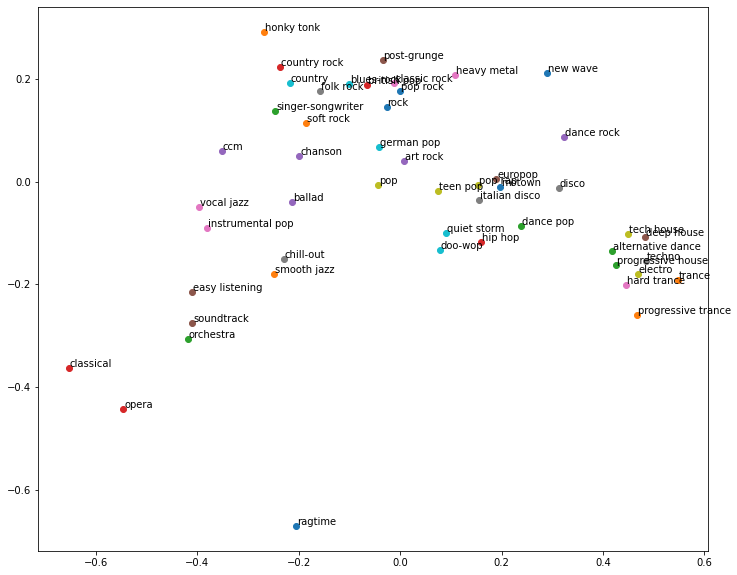

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(12,10))
most_common = Counter(labels).most_common(50)

for k, _ in most_common:
    x = matrix_red[labels == k, 0].mean()
    y = matrix_red[labels == k, 1].mean()
    axs.scatter(x, y, label=k)
    axs.text(x + 0.002, y + 0.002, s=k, ha="left")
    
plt.show()

### Plotting all songs from genres

Now, let's look at a case study of some interesting genres. Notably, we see trance (far right), rock (top middle) and opera (far left) are quite far from each other on the centroid graph.

We want to individually plot the songs in our dataset to identify the relationships between these genres.

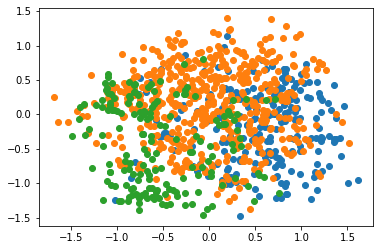

In [12]:
plt.scatter(matrix_red[labels == "trance", 0], matrix_red[labels == "trance", 1])
plt.scatter(matrix_red[labels == "rock", 0], matrix_red[labels == "rock", 1])
plt.scatter(matrix_red[labels == "opera", 0], matrix_red[labels == "opera", 1])

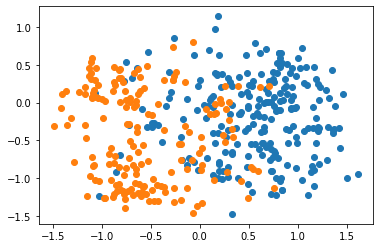

In [13]:
plt.scatter(matrix_red[labels == "trance", 0], matrix_red[labels == "trance", 1])
plt.scatter(matrix_red[labels == "opera", 0], matrix_red[labels == "opera", 1])

# Distances between genres

To examine the relationships between any two genres of our choice, we propose the following strategies.

1. Plotting the distance between 2 selected genres through PCA
2. Cosine similarity between the average vector for the points in a genre

The reason we use average vectors for Cosine Similarity is because the number of songs for each genre differ. To address this problem, we then look at a sample of 100 songs from each genre, and compute distance between the distributions using the Wasserstein metric.

3. Wasserstein distance between the music vectors

In [14]:
# Select the genres
genres_50 = dict(most_common).keys()

genre_1 = widgets.Dropdown(
    options=genres_50,
    value='hip hop',
    description='Genre 1:',
    disabled=True
)

genre_2 = widgets.Dropdown(
    options=genres_50,
    value='country',
    description='Genre 2:',
    disabled=True
)

# temporary workaround
genre_1 = 'hip hop'
genre_2 = 'country'

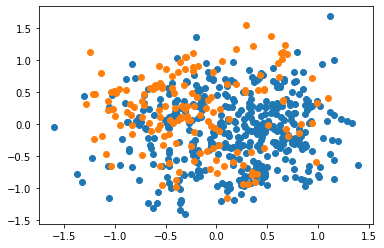

In [15]:
# Plot the genres
plt.scatter(matrix_red[labels == genre_1, 0], matrix_red[labels == genre_1, 1])
plt.scatter(matrix_red[labels == genre_2, 0], matrix_red[labels == genre_2, 1])

In [16]:
avg_genre_1 = np.mean(matrix[labels == genre_1], axis=0)
avg_genre_2 = np.mean(matrix[labels == genre_2], axis=0)

np.round(scipy.spatial.distance.cosine(avg_genre_1, avg_genre_2), 4)

0.0586

In [17]:
# Representative sample of 100 points
genre_1_sample = np.array(random.sample(list(matrix[labels == genre_1]), 100)).reshape(-1)
genre_2_sample = np.array(random.sample(list(matrix[labels == genre_2]), 100)).reshape(-1)

np.round(scipy.stats.wasserstein_distance(genre_1_sample, genre_2_sample), 4)

0.0099

## Genre Analysis

Looking at one specific genre, how can we identify which genres are closest and which are furthest away?

We use our sample of 50 most common genres (with over 100 songs each) for fair comparisons with known song genres.

In [18]:
genre = widgets.Dropdown(
    options=dict(most_common).keys(),
    value='hip hop',
    description='Genre:',
    disabled=True
)

# Workaround
genre = 'hip hop'

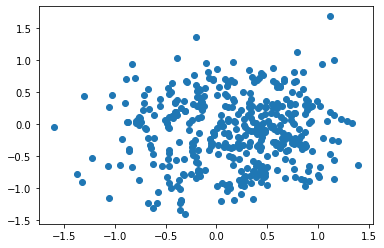

In [19]:
plt.scatter(matrix_red[labels == genre, 0], matrix_red[labels == genre, 1])

In [20]:
# Identify genres in the top 50 that are most similar

def cosine_distance(g1, g2):
    avg_genre_1 = np.mean(matrix[labels == g1], axis=0)
    avg_genre_2 = np.mean(matrix[labels == g2], axis=0)
    return np.round(scipy.spatial.distance.cosine(avg_genre_1, avg_genre_2), 4)

distances = []
for g in genres_50:
    distances.append(cosine_distance(genre, g))

K = 6
res = sorted(range(len(distances)), key = lambda sub: distances[sub])[:K]
print('Most similar genres to ' + genre + ': ')
for i in res[1:]:
    print(list(genres_50)[i])

Most similar genres to hip hop: 
pop rap
dance pop
teen pop
italian disco
europop


In [21]:
# Identify genres in the top 50 that are most different

K = 6
res = sorted(range(len(distances)), key = lambda sub: 1-distances[sub])[:K]
print('Most different genres to ' + genre + ': ')
for i in res[1:]:
    print(list(genres_50)[i])

Most different genres to hip hop: 
classical
orchestra
opera
honky tonk
heavy metal


# Finding directions that capture cultural concepts

We can also find directions in this embedding space that specific concepts. For instance, we can:

1. get 10 dance-pop songs and 10 classical songs at random; and
2. find the direction that connects these songs in the latent space;

Then, we obtain a pop-to-classical dimension!

In [22]:
np.random.seed(1)
techno_ids = list(df[df["tag_echo"] == "dance pop"]["id"].sample(10))
classic_ids = list(df[df["tag_echo"] == "classical"]["id"].sample(10))

def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives if x in emb])\
            - sum([normalize(model[y]) for y in negatives if x in emb])
    return diff

pop_classical = dimension(emb, techno_ids, classic_ids)
pop_classical


array([-0.22768542,  0.7038114 ,  0.12573288, -0.45013154,  0.05201823,
       -0.4986701 , -0.25143322, -0.16320103,  0.15008506,  1.518119  ,
       -0.03652236,  0.3263729 ,  1.6384163 , -0.10197072, -0.5684476 ,
        0.349621  ,  0.3130905 , -0.03259359, -0.24284372, -0.9244533 ,
        0.34683406, -0.66050655, -0.4542923 ,  0.30777916, -1.2033869 ,
        0.8782921 , -0.0177705 , -0.43704838,  0.252923  , -0.42306107,
       -0.18101001, -0.3427562 , -0.32924092,  0.84625274, -0.09520827,
       -0.01579109, -1.2934986 , -0.3179969 ,  0.26685065,  0.3249407 ,
        0.40294048, -0.36735326,  0.5336869 , -0.14677222,  1.4050361 ,
       -0.2831515 ,  0.00228691, -0.12591013,  1.5792587 ,  0.42635047,
        0.4399443 , -0.8435118 ,  0.30881074, -0.75263065,  0.5784111 ,
        0.8137442 ,  0.2688002 , -0.28528976, -0.57270175, -0.29604214,
       -0.29960155,  0.86175734,  0.24991557, -0.73709667, -1.1518217 ,
        0.24954095, -0.7909342 , -0.5675037 , -0.05335023, -0.50

We can then get 7 rock songs at random and see how they score in this "pop-to-classic" scale

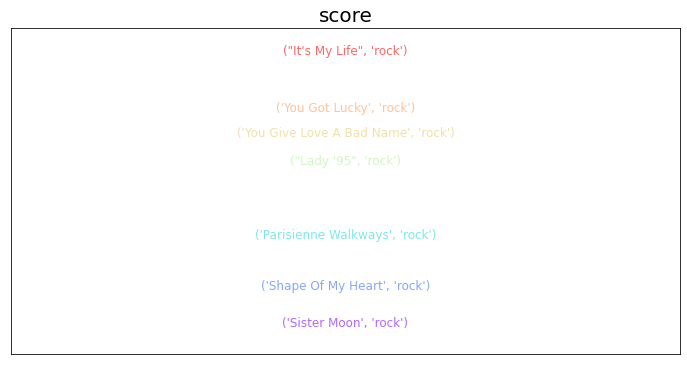

In [23]:
import sklearn

def makeDF(model, word_list, dimension):
    g = []
    song_infos = []
    ids = []
    for word in word_list:
        if word not in model:
            continue
        song_info = df[df["id"] == word][["song_name", "tag_echo"]]
        song_infos.append(tuple(song_info.values[0]))
        g.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1),
                                                            pop_classical.reshape(1,-1))[0][0])
        ids.append(word)
    df_ = pd.DataFrame({'score': g, "id": ids}, index=song_infos)
    return df_

def Coloring(series):
    x = series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax, df, dim):
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0.5, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12, ha="center")
    d = df[dim].max() - df[dim].min()
    MaxY = df[dim].max() + d/10 
    MinY = df[dim].min() - d/10
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

np.random.seed(7)
technoclassic_df = makeDF(emb, df[df["tag_echo"] == "rock"]["id"].sample(7), dimension=pop_classical) 

fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(111)
PlotDimension(ax1, technoclassic_df, 'score')

We find that the most classic song is "Sister Moon" by Sting, a melancholic piece featuring a sax and string instruments. Meanwhile, the most pop-like is Bon Jovi's It's My Life, a highly danceable song!

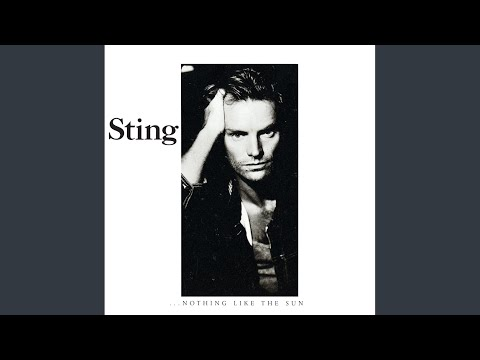

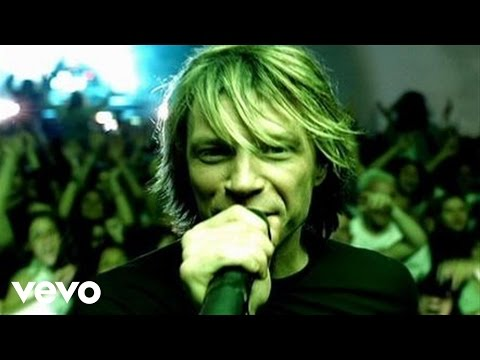

In [24]:
from IPython.display import YouTubeVideo
from IPython.display import HTML

display(HTML("<h2>Most classic-like</h2>"))
display(YouTubeVideo('TS0oP1FkGFA', width=800, height=300))
display(HTML("<h2>Most pop-like</h2>"))
display(YouTubeVideo('vx2u5uUu3DE', width=800, height=300))

# Billy Joel trajectory

Last, we use our embedding to examine the musical trajectory of one of our favorite artists, Billy Joel. We begin by fetching all of his songs in the dataset, which are spread through the 70s and 80s.

In [25]:
tmp = df[df.artist_name_x == "Billy Joel"]
tmp = tmp[tmp.year_x > 0].copy(deep=True)
tmp["decade"] = (tmp.year_x // 10 ) * 10
tmp = tmp.drop_duplicates("song_name")
tmp[["song_name", "decade", "tag_echo"]].sort_values("decade")

,song_name,decade,tag_echo
9148,The Stranger,1970,soft rock
26793,52nd Street,1970,soft rock
25931,Scenes From An Italian Restaurant,1970,soft rock
17021,Piano Man,1970,soft rock
14183,New York State Of Mind,1970,soft rock
9821,Rosalinda's Eyes,1970,soft rock
7673,Prelude/Angry Young Man,1970,soft rock
30482,Honesty,1970,soft rock
4187,Big Shot,1970,soft rock
4146,Movin' Out (Anthony's Song),1970,soft rock


Then, we calculate the average embedding position for the two decades, and proceed to plot it in our embedding space. 
We again plot the genre labels for comparison!

In [26]:
tmp = tmp.groupby("decade")["id"].apply(lambda xs: 
                                        np.mean([matrix_red[acc_ids.index(x)] for x in xs.values], axis=0))
tmp

decade
1970    [-0.100939736, 0.027260136]
1980       [0.39011928, 0.15072693]
Name: id, dtype: object

1970 [-0.10093974  0.02726014]
1980 [0.39011928 0.15072693]


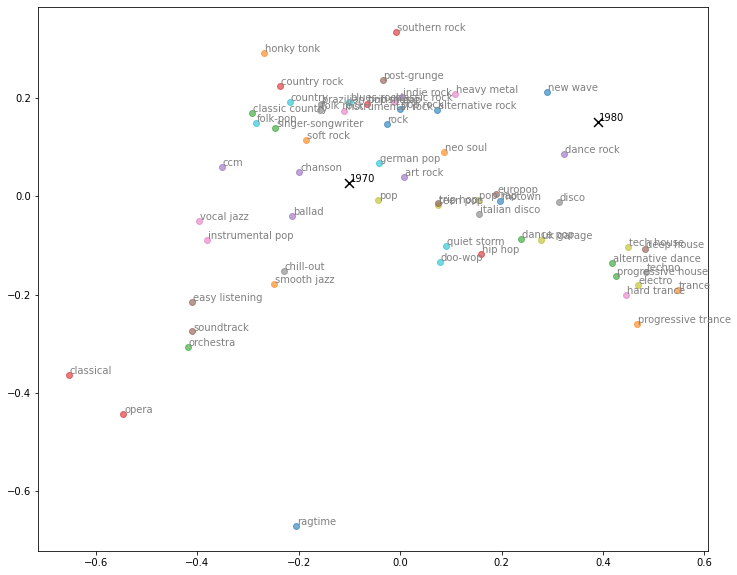

In [27]:
fig, axs = plt.subplots(1, 1, figsize=(12,10))
most_common = Counter(labels).most_common(60)

for k, _ in most_common:
    x = matrix_red[labels == k, 0].mean()
    y = matrix_red[labels == k, 1].mean()
    axs.scatter(x, y, label=k, alpha=0.6)
    axs.text(x + 0.002, y + 0.002, s=k, ha="left", color="gray")

for k, v in tmp.items():
    print(k, v)
    axs.scatter(v[0], v[1], label=k, marker = "x", color="black", s=80)
    axs.text(v[0] + 0.002, v[1] + 0.002,  s=str(k), ha="left")


plt.show()

The plot shows how Billy joel songs switched from ballad/chanson-like (like 
[Piano Man](https://www.youtube.com/watch?v=gxEPV4kolz0) and 
[New York State Of Mind](https://www.youtube.com/watch?v=ol0dPJdzm1M)) 
in the 1970s
to closer to dance rock in the 1980s (like [We Didn't Start The Fire](https://www.youtube.com/watch?v=eFTLKWw542g)).